In [1]:
%pip install pandas matplotlib seaborn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 5.8 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.0 MB 6.5 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 6.8 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.0 MB 7.1 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 7.4 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 10.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 10.4 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 9.1 MB/s eta 0:00:01
   ------------------


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a nice style for plots
sns.set_theme(style="whitegrid")

# Define where to save plots
EXPORT_DIR = "export_examples"
if not os.path.exists(EXPORT_DIR):
    os.makedirs(EXPORT_DIR)

print("Libraries imported.")

Libraries imported.


## 1. Load Data
### Option 1: Load from CSV (Easy)

Go to your app and click "Export Log (CSV)". Save the downloaded `nomadcloset_actions_export.csv` file into the `analysis/export_examples/` directory.

We will use the `sample_actions.csv` file for this test.

In [3]:
# --- Load Data from CSV ---

# Use the sample file I provided
CSV_FILE_PATH = "export_examples/sample_actions.csv" 
# Or, if you have your own:
# CSV_FILE_PATH = "export_examples/nomadcloset_actions_export.csv"

try:
    df_actions = pd.read_csv(CSV_FILE_PATH)
    print(f"Successfully loaded {len(df_actions)} actions from {CSV_FILE_PATH}")
except FileNotFoundError:
    print(f"Error: File not found at {CSV_FILE_PATH}")
    print("Please make sure you have the 'sample_actions.csv' file in the 'analysis/export_examples/' folder.")

# --- Data Cleaning ---
if 'df_actions' in locals():
    # Convert created_at to datetime objects for time-series analysis
    df_actions['created_at'] = pd.to_datetime(df_actions['created_at'])
    
    # Show schema and first rows
    print("\n--- Data Schema (DataFrame dtypes) ---")
    print(df_actions.info())
    
    print("\n--- First 5 Rows ---")
    display(df_actions.head())

Successfully loaded 12 actions from export_examples/sample_actions.csv

--- Data Schema (DataFrame dtypes) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             12 non-null     object             
 1   user_id        12 non-null     object             
 2   session_id     12 non-null     object             
 3   action_type    12 non-null     object             
 4   item_id        9 non-null      object             
 5   item_name      11 non-null     object             
 6   from_place_id  6 non-null      object             
 7   to_place_id    11 non-null     object             
 8   metadata       9 non-null      object             
 9   created_at     7 non-null      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 1.1+ KB
None

--- First 5 Rows ---


,id,user_id,session_id,action_type,item_id,item_name,from_place_id,to_place_id,metadata,created_at
0,act_1678886400_1,user_b7e7a8d2,sess_abc123,create_place,NaN,Casa Uni,NaN,"{""category"": null}"",2025-03-15T12:00:00Z\r\nac...",2025-03-15T12:00:01Z,NaT
1,act_1678886402_3,user_b7e7a8d2,sess_abc123,create_place,NaN,Valigia,NaN,"{""category"": null}"",2025-03-15T12:00:02Z\r\nac...",2025-03-15T12:00:30Z,NaT
2,act_1678886435_5,user_b7e7a8d2,sess_abc123,create_item,item_d4e2b0e8,Laptop Charger,NaN,"{""category"": ""Tech""}",2025-03-15T12:00:35Z,NaT
3,act_1678886440_6,user_b7e7a8d2,sess_abc123,create_item,item_f5a3c1f9,"Book - """"Dune""""",NaN,"{""category"": ""Reading""}",2025-03-15T12:00:40Z,NaT
4,act_1678886445_7,user_b7e7a8d2,sess_abc123,create_item,item_g6b4d2a0,Sneakers,NaN,"{""category"": ""Clothing""}",2025-03-15T12:00:45Z,NaT


## 2. Analysis: Action Types
What are users doing in the app? Let's count the different `action_type` values.

--- Action Counts ---
action_type
move_item       6
create_item     3
create_place    2
export_csv      1
Name: count, dtype: int64


C:\Users\mox\AppData\Local\Temp\ipykernel_1396\2624293448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette="viridis")



Plot saved to export_examples\plot_action_counts.png


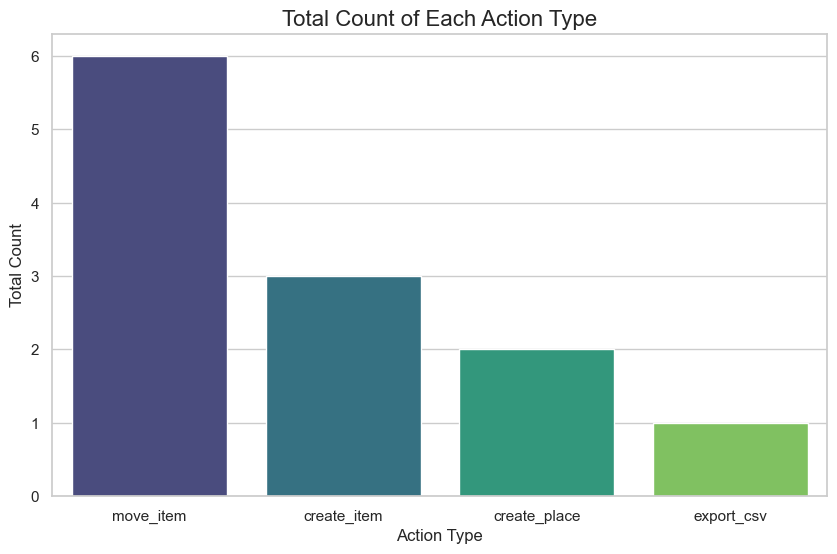

In [6]:
if 'df_actions' in locals():
    action_counts = df_actions['action_type'].value_counts()
    print("--- Action Counts ---")
    print(action_counts)

    # --- Visualization 1: Bar Chart of Action Types ---
    plt.figure(figsize=(10, 6))
    sns.barplot(x=action_counts.index, y=action_counts.values, palette="viridis")
    plt.title('Total Count of Each Action Type', fontsize=16)
    plt.ylabel('Total Count')
    plt.xlabel('Action Type')
    
    # Save the plot
    plot_path = os.path.join(EXPORT_DIR, "plot_action_counts.png")
    plt.savefig(plot_path)
    print(f"\nPlot saved to {plot_path}")
    
    plt.show()

### Time Series: Actions Per Day

--- Actions Per Day ---
created_at
2025-03-15 00:00:00+00:00    4
2025-03-16 00:00:00+00:00    3
dtype: int64


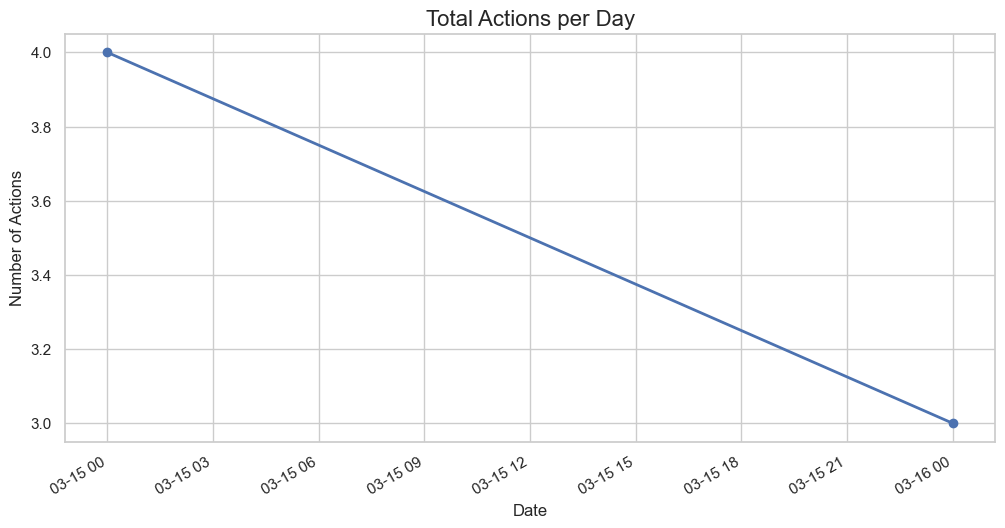

In [7]:
if 'df_actions' in locals():
    # Set the 'created_at' as the index for time-series resampling
    df_time = df_actions.set_index('created_at')
    
    # Resample by day ('D') and count the number of actions
    actions_per_day = df_time.resample('D').size()
    
    print("--- Actions Per Day ---")
    print(actions_per_day)
    
    # Plot the time series
    plt.figure(figsize=(12, 6))
    actions_per_day.plot(linewidth=2, marker='o')
    plt.title('Total Actions per Day', fontsize=16)
    plt.ylabel('Number of Actions')
    plt.xlabel('Date')
    plt.show()

## 3. Analysis: Most Moved Items
Which items are moved the most?

In [8]:
if 'df_actions' in locals():
    # Filter for 'move_item' actions
    df_moves = df_actions[df_actions['action_type'] == 'move_item'].copy()
    
    if not df_moves.empty:
        top_10_moved = df_moves['item_name'].value_counts().head(10)
        
        print("--- Top 10 Most Moved Items (by name) ---")
        print(top_10_moved)
    else:
        print("No 'move_item' actions found yet.")

--- Top 10 Most Moved Items (by name) ---
item_name
Black Hoodie       2
Laptop Charger     2
Sneakers           1
Book - ""Dune""    1
Name: count, dtype: int64


## 4. Analysis: Transition Heatmap
Where do items move? We can create a heatmap of `from_place_id` to `to_place_id`.

--- Transition Matrix ---


to_place_name,Casa Uni,Valigia
from_place_name,,
Casa Genitori,0,1
Casa Uni,0,3
Valigia,2,0



Plot saved to export_examples\plot_transition_heatmap.png


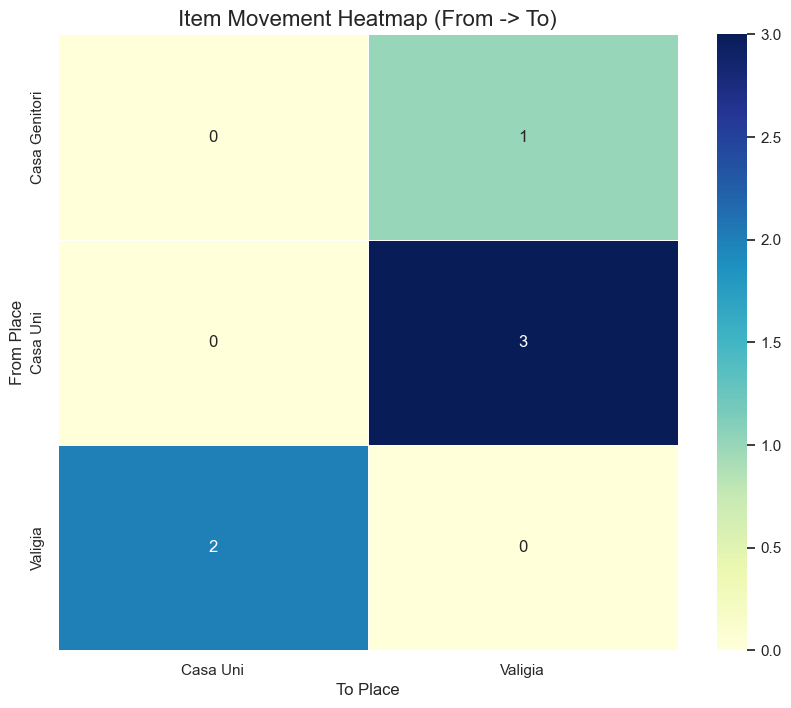

In [9]:
if 'df_moves' in locals() and not df_moves.empty:
    # To make this readable, we need place *names*.
    # Let's get them from the 'create_place' actions.
    # In our app, the place name is stored in 'item_name' for 'create_place' actions
    df_places = df_actions[df_actions['action_type'] == 'create_place']
    
    # Create a mapping dictionary {place_id: place_name}
    # Note: 'to_place_id' is used to store the new place's ID
    place_name_map = df_places.set_index('to_place_id')['item_name'].to_dict()
    
    # We need to find the *real* IDs from the sample data.
    # Let's manually add the default names from the sample CSV
    place_name_map['place_uni'] = 'Casa Uni'
    place_name_map['place_genitori'] = 'Casa Genitori'
    place_name_map['place_valigia'] = 'Valigia'

    # Map the IDs to names in our moves dataframe
    df_moves['from_place_name'] = df_moves['from_place_id'].map(place_name_map).fillna('Unknown')
    df_moves['to_place_name'] = df_moves['to_place_id'].map(place_name_map).fillna('Unknown')
    
    # Create a pivot table (transition matrix)
    transition_matrix = pd.pivot_table(df_moves,
                                       index='from_place_name',
                                       columns='to_place_name',
                                       values='id',
                                       aggfunc='count',
                                       fill_value=0)
    
    print("--- Transition Matrix ---")
    display(transition_matrix)

    # --- Visualization 2: Heatmap of Item Transitions ---
    if not transition_matrix.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(transition_matrix, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
        plt.title('Item Movement Heatmap (From -> To)', fontsize=16)
        plt.xlabel('To Place')
        plt.ylabel('From Place')
        
        plot_path = os.path.join(EXPORT_DIR, "plot_transition_heatmap.png")
        plt.savefig(plot_path, bbox_inches='tight')
        print(f"\nPlot saved to {plot_path}")
        
        plt.show()
    else:
        print("Transition matrix is empty, skipping heatmap.")
        
else:
    print("No 'move_item' data available to build a heatmap.")

## 5. Analysis: Item Lifetime
How long does an item exist before its last move?

--- Item Lifetimes (Days from Create to Last Move) ---


,creation_time,last_move_time,days_to_last_move
item_id,,,
item_d4e2b0e8,NaT,2025-03-16 16:00:05+00:00,NaN
item_f5a3c1f9,NaT,2025-03-16 16:00:10+00:00,NaN
item_g6b4d2a0,NaT,2025-03-15 12:01:04+00:00,NaN



Plot saved to export_examples\plot_lifetime_distribution.png


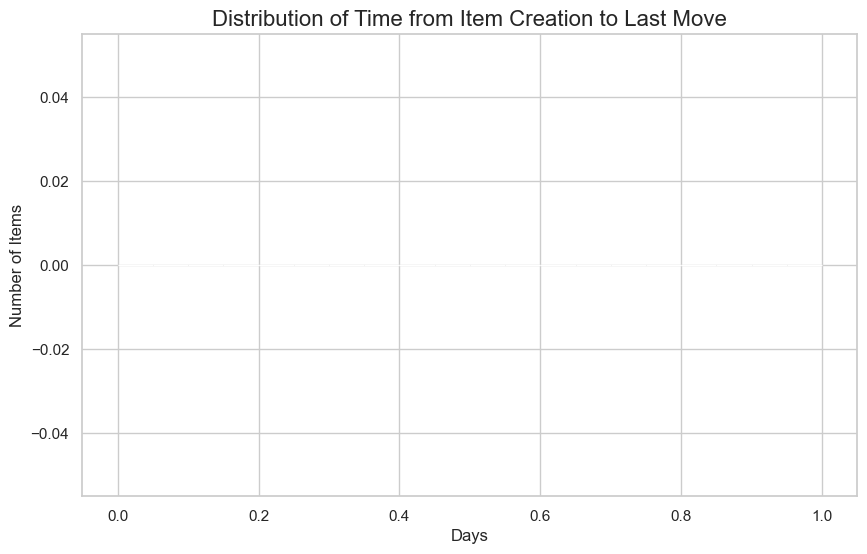

In [10]:
if 'df_actions' in locals():
    # Get creation times
    df_item_creates = df_actions[df_actions['action_type'] == 'create_item'] \
                        .groupby('item_id')['created_at'].min().to_frame('creation_time')
    
    # Get last move times
    df_item_moves = df_actions[df_actions['action_type'] == 'move_item'] \
                      .groupby('item_id')['created_at'].max().to_frame('last_move_time')
    
    # Combine them
    df_lifetimes = df_item_creates.join(df_item_moves, how='inner') # 'inner' = only items that have been moved
    
    if not df_lifetimes.empty:
        # Calculate the difference in days
        df_lifetimes['days_to_last_move'] = (df_lifetimes['last_move_time'] - df_lifetimes['creation_time']).dt.total_seconds() / (60*60*24)
        
        print("--- Item Lifetimes (Days from Create to Last Move) ---")
        display(df_lifetimes.head())
        
        # --- Visualization 3: Distribution of Item Lifetimes ---
        plt.figure(figsize=(10, 6))
        sns.histplot(df_lifetimes['days_to_last_move'], kde=True, bins=20)
        plt.title('Distribution of Time from Item Creation to Last Move', fontsize=16)
        plt.xlabel('Days')
        plt.ylabel('Number of Items')
        
        plot_path = os.path.join(EXPORT_DIR, "plot_lifetime_distribution.png")
        plt.savefig(plot_path)
        print(f"\nPlot saved to {plot_path}")
        
        plt.show()
    else:
        print("No items found that were both created and moved. Run the app more!")